# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# (실습준비) 데이터 불러오기부터

* 17년도부터 21년도 까지의 데이터를 train set, 22년도의 6개월치 데이터를 test set 으로 설정합니다.

In [195]:
#from google.colab import drive
#drive.mount('/content/drive')

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# 학습 데이터 로딩

df_total = pd.read_csv('df_total.csv')



---

# 1. 데이터 전처리

#### [실습문제1] 열 추가 
* 기존 '기준일ID'열에서 날짜 데이터를 추출하여 새로운 열로 추가 합니다.
    - pd.to_datetime() 함수를 사용해 '기준일ID'열을 datetime 형식으로 변경하겠습니다.
    - year, month, day 열로 기존 데이터 프레임에 연월일 정보를 저장합니다.
    - 데이터 프레임 열에 대해 날짜 정보를 얻을 때에는 **dt.year**, **dt.month**, **dt.day** 속성을 사용합니다. 

In [197]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df_total['기준일ID'] = pd.to_datetime(df_total['기준일ID'])

df_total['year'] = df_total['기준일ID'].dt.year
df_total['month'] = df_total['기준일ID'].dt.month
df_total['day'] = df_total['기준일ID'].dt.day

df_total


,기준일ID,시간대구분,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,...,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,year,month,day
0,2017-01-01,0,43922.2281,953.7652,627.7225,927.6134,2025.0630,2278.7336,1744.8161,1713.6754,...,1754.6515,1636.4175,1521.3668,1728.0639,1484.4518,1238.2606,3670.0451,2017,1,1
1,2017-01-01,1,43763.4929,962.2909,633.3292,970.6215,2045.7002,2412.6287,1765.7725,1765.1171,...,1700.9196,1619.3672,1474.8418,1661.3750,1470.3009,1098.4788,3568.8258,2017,1,1
2,2017-01-01,2,43561.5708,932.2939,613.6027,964.3505,2057.3601,2419.0941,1734.0569,1746.3940,...,1660.6697,1660.9852,1511.4103,1635.0352,1441.0173,1112.3632,3541.2620,2017,1,1
3,2017-01-01,3,43928.9929,926.3617,609.7009,983.2400,2100.5071,2480.1898,1780.3833,1723.6640,...,1678.9374,1626.8350,1516.5837,1665.8781,1471.2127,1098.3154,3630.0822,2017,1,1
4,2017-01-01,4,44150.2973,922.8893,607.4184,990.0534,2128.2729,2531.6549,1774.7853,1752.0073,...,1678.6174,1640.9056,1513.5035,1653.2704,1435.5180,1090.4059,3569.1653,2017,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43507,2021-12-31,19,33304.5400,569.3452,374.9229,702.9942,1195.0912,1818.2627,1434.7351,1439.8129,...,1136.8778,1399.4513,1262.9415,1342.7762,1058.0542,749.3935,2239.1210,2021,12,31
43508,2021-12-31,20,33368.7201,599.9827,395.0698,806.5718,1232.5401,1781.4567,1441.6411,1469.7313,...,1124.4243,1414.3330,1224.8609,1336.5298,1056.6818,756.4905,2226.3545,2021,12,31
43509,2021-12-31,21,34083.1721,630.5049,415.1424,825.4794,1360.3197,1866.0852,1428.3237,1490.6164,...,1174.9639,1477.2012,1250.2445,1336.1856,1042.3110,750.1392,2249.0323,2021,12,31
43510,2021-12-31,22,34380.0806,618.6265,407.3311,831.6651,1364.7723,1899.4216,1416.2191,1473.4710,...,1171.6865,1488.2721,1269.3231,1334.5079,1045.8411,762.5466,2263.6665,2021,12,31


#### [실습문제2] 불필요한 열 제거 및 열 이름 변경
* df_total과 df_test에서 '총생활인구수'외에 불필요한 열을 제거 하도록 하겠습니다.
* 시간 데이터를 남기고, '시간대구분' column 을 'hour'로 rename 하도록 하겠습니다. 

In [198]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.


df_total = df_total[['year','month','day','시간대구분','총생활인구수']]
df_total.rename(columns={'시간대구분':'hour'},inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_15332\1977591530.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total.rename(columns={'시간대구분':'hour'},inplace=True)


#### [실습문제3] 시프트 & 롤링
* shift()를 활용하여 이동할 행 수를 지정합니다.
* rolling()을 활용하여 추가할 이동평균 수를 지정합니다.

In [199]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df_total['1d'] = df_total['총생활인구수'].shift(24*7*8-24*3)
df_total['2d'] = df_total['총생활인구수'].shift(24*7*16-24*3)
df_total['3d'] = df_total['총생활인구수'].shift(24*7*24-24*3)
df_total['4d'] = df_total['총생활인구수'].shift(24*7*32-24*3)
df_total['5d'] = df_total['총생활인구수'].shift(24*7*40-24*3)
df_total['6d'] = df_total['총생활인구수'].shift(24*7*48-24*3)




C:\Users\PC\AppData\Local\Temp\ipykernel_15332\690406799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['1d'] = df_total['총생활인구수'].shift(24*7*8-24*3)
C:\Users\PC\AppData\Local\Temp\ipykernel_15332\690406799.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['2d'] = df_total['총생활인구수'].shift(24*7*16-24*3)
C:\Users\PC\AppData\Local\Temp\ipykernel_15332\690406799.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [302]:
pd.set_option('display.max_row', 100)
df_total
df_total[(df_total['year']==2019)&((df_total['month']==1)|(df_total['month']==2))].reset_index(drop=True)[170:270]



,year,month,day,hour,총생활인구수
170,2019,1,8,2,43639.9283
171,2019,1,8,3,43632.4529
172,2019,1,8,4,43981.2098
173,2019,1,8,5,43911.0885
174,2019,1,8,6,43658.4432
175,2019,1,8,7,44071.2214
176,2019,1,8,8,41289.6522
177,2019,1,8,9,40229.0774
178,2019,1,8,10,39478.6806
179,2019,1,8,11,38836.3201


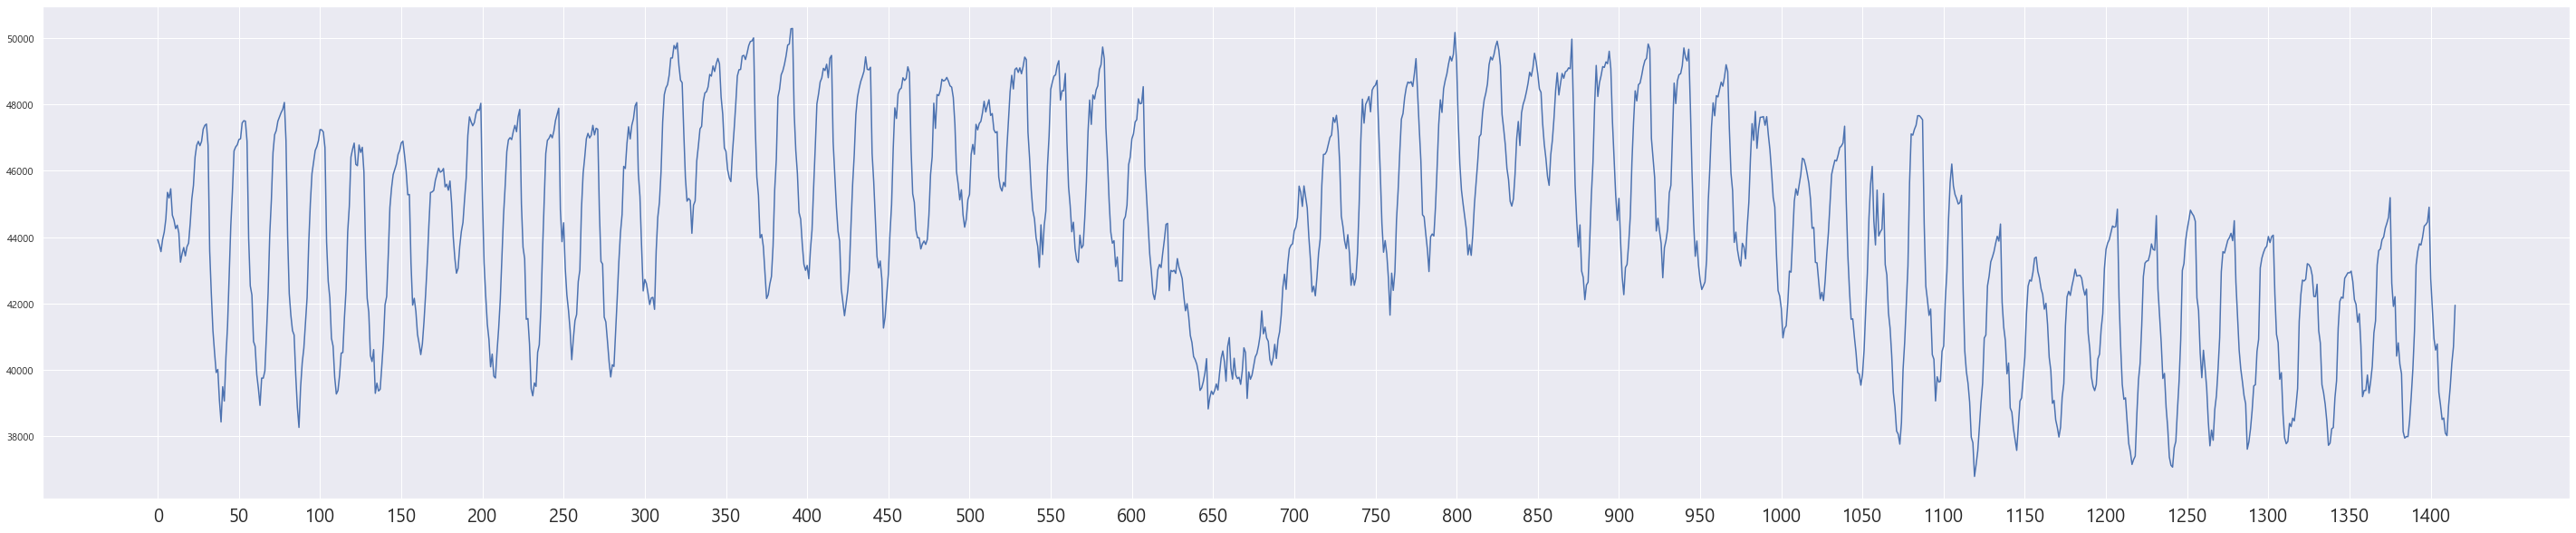

In [201]:
plt.figure(figsize=(50,10))
x=range(0,1416,50)
plt.rc('xtick', labelsize=20)
plt.plot(df_total[(df_total['year']==2017)&((df_total['month']==1)|(df_total['month']==2))]['총생활인구수'])
plt.xticks(x)



plt.show()

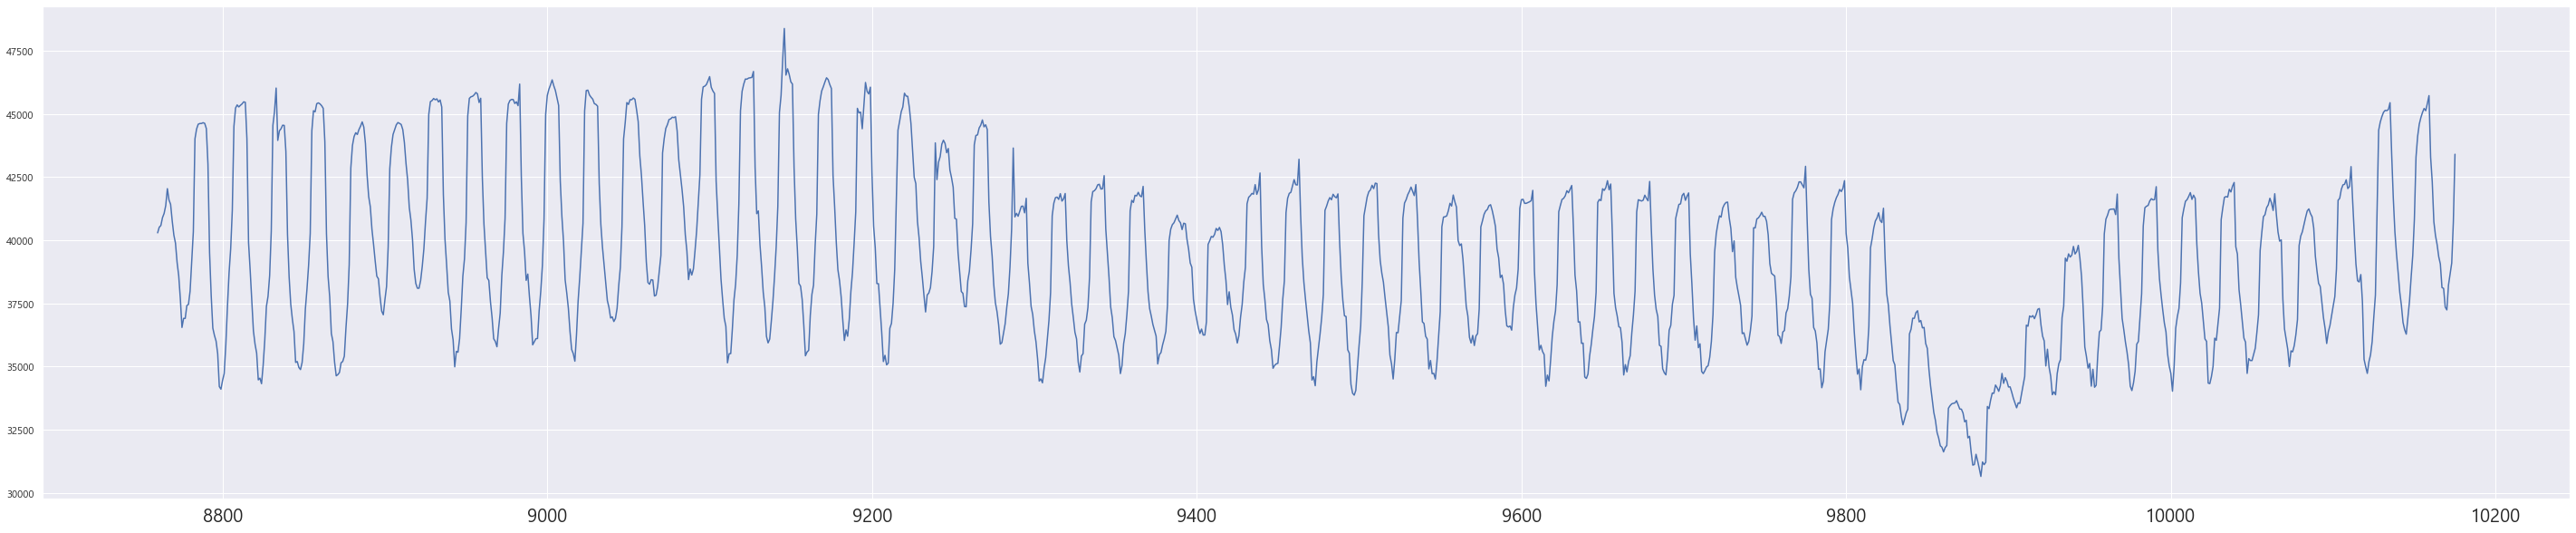

In [202]:
plt.figure(figsize=(50,10))

plt.rc('xtick', labelsize=20)
plt.plot(df_total[(df_total['year']==2018)&((df_total['month']==1)|(df_total['month']==2))]['총생활인구수'])


plt.show()

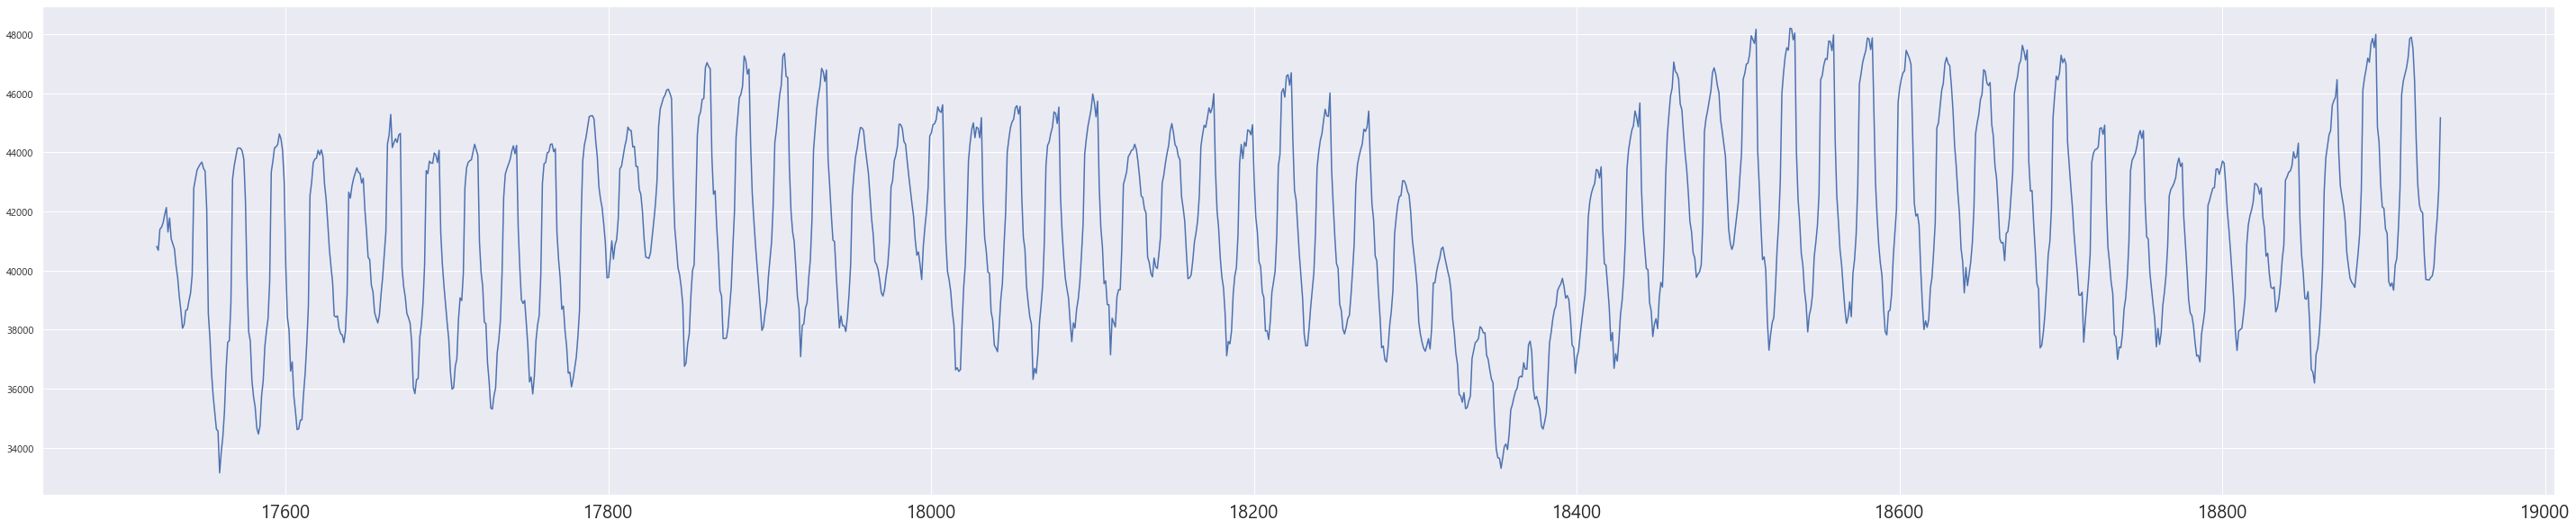

In [203]:
plt.figure(figsize=(50,10))

plt.rc('xtick', labelsize=20)
plt.plot(df_total[(df_total['year']==2019)&((df_total['month']==1)|(df_total['month']==2))]['총생활인구수'])


plt.show()

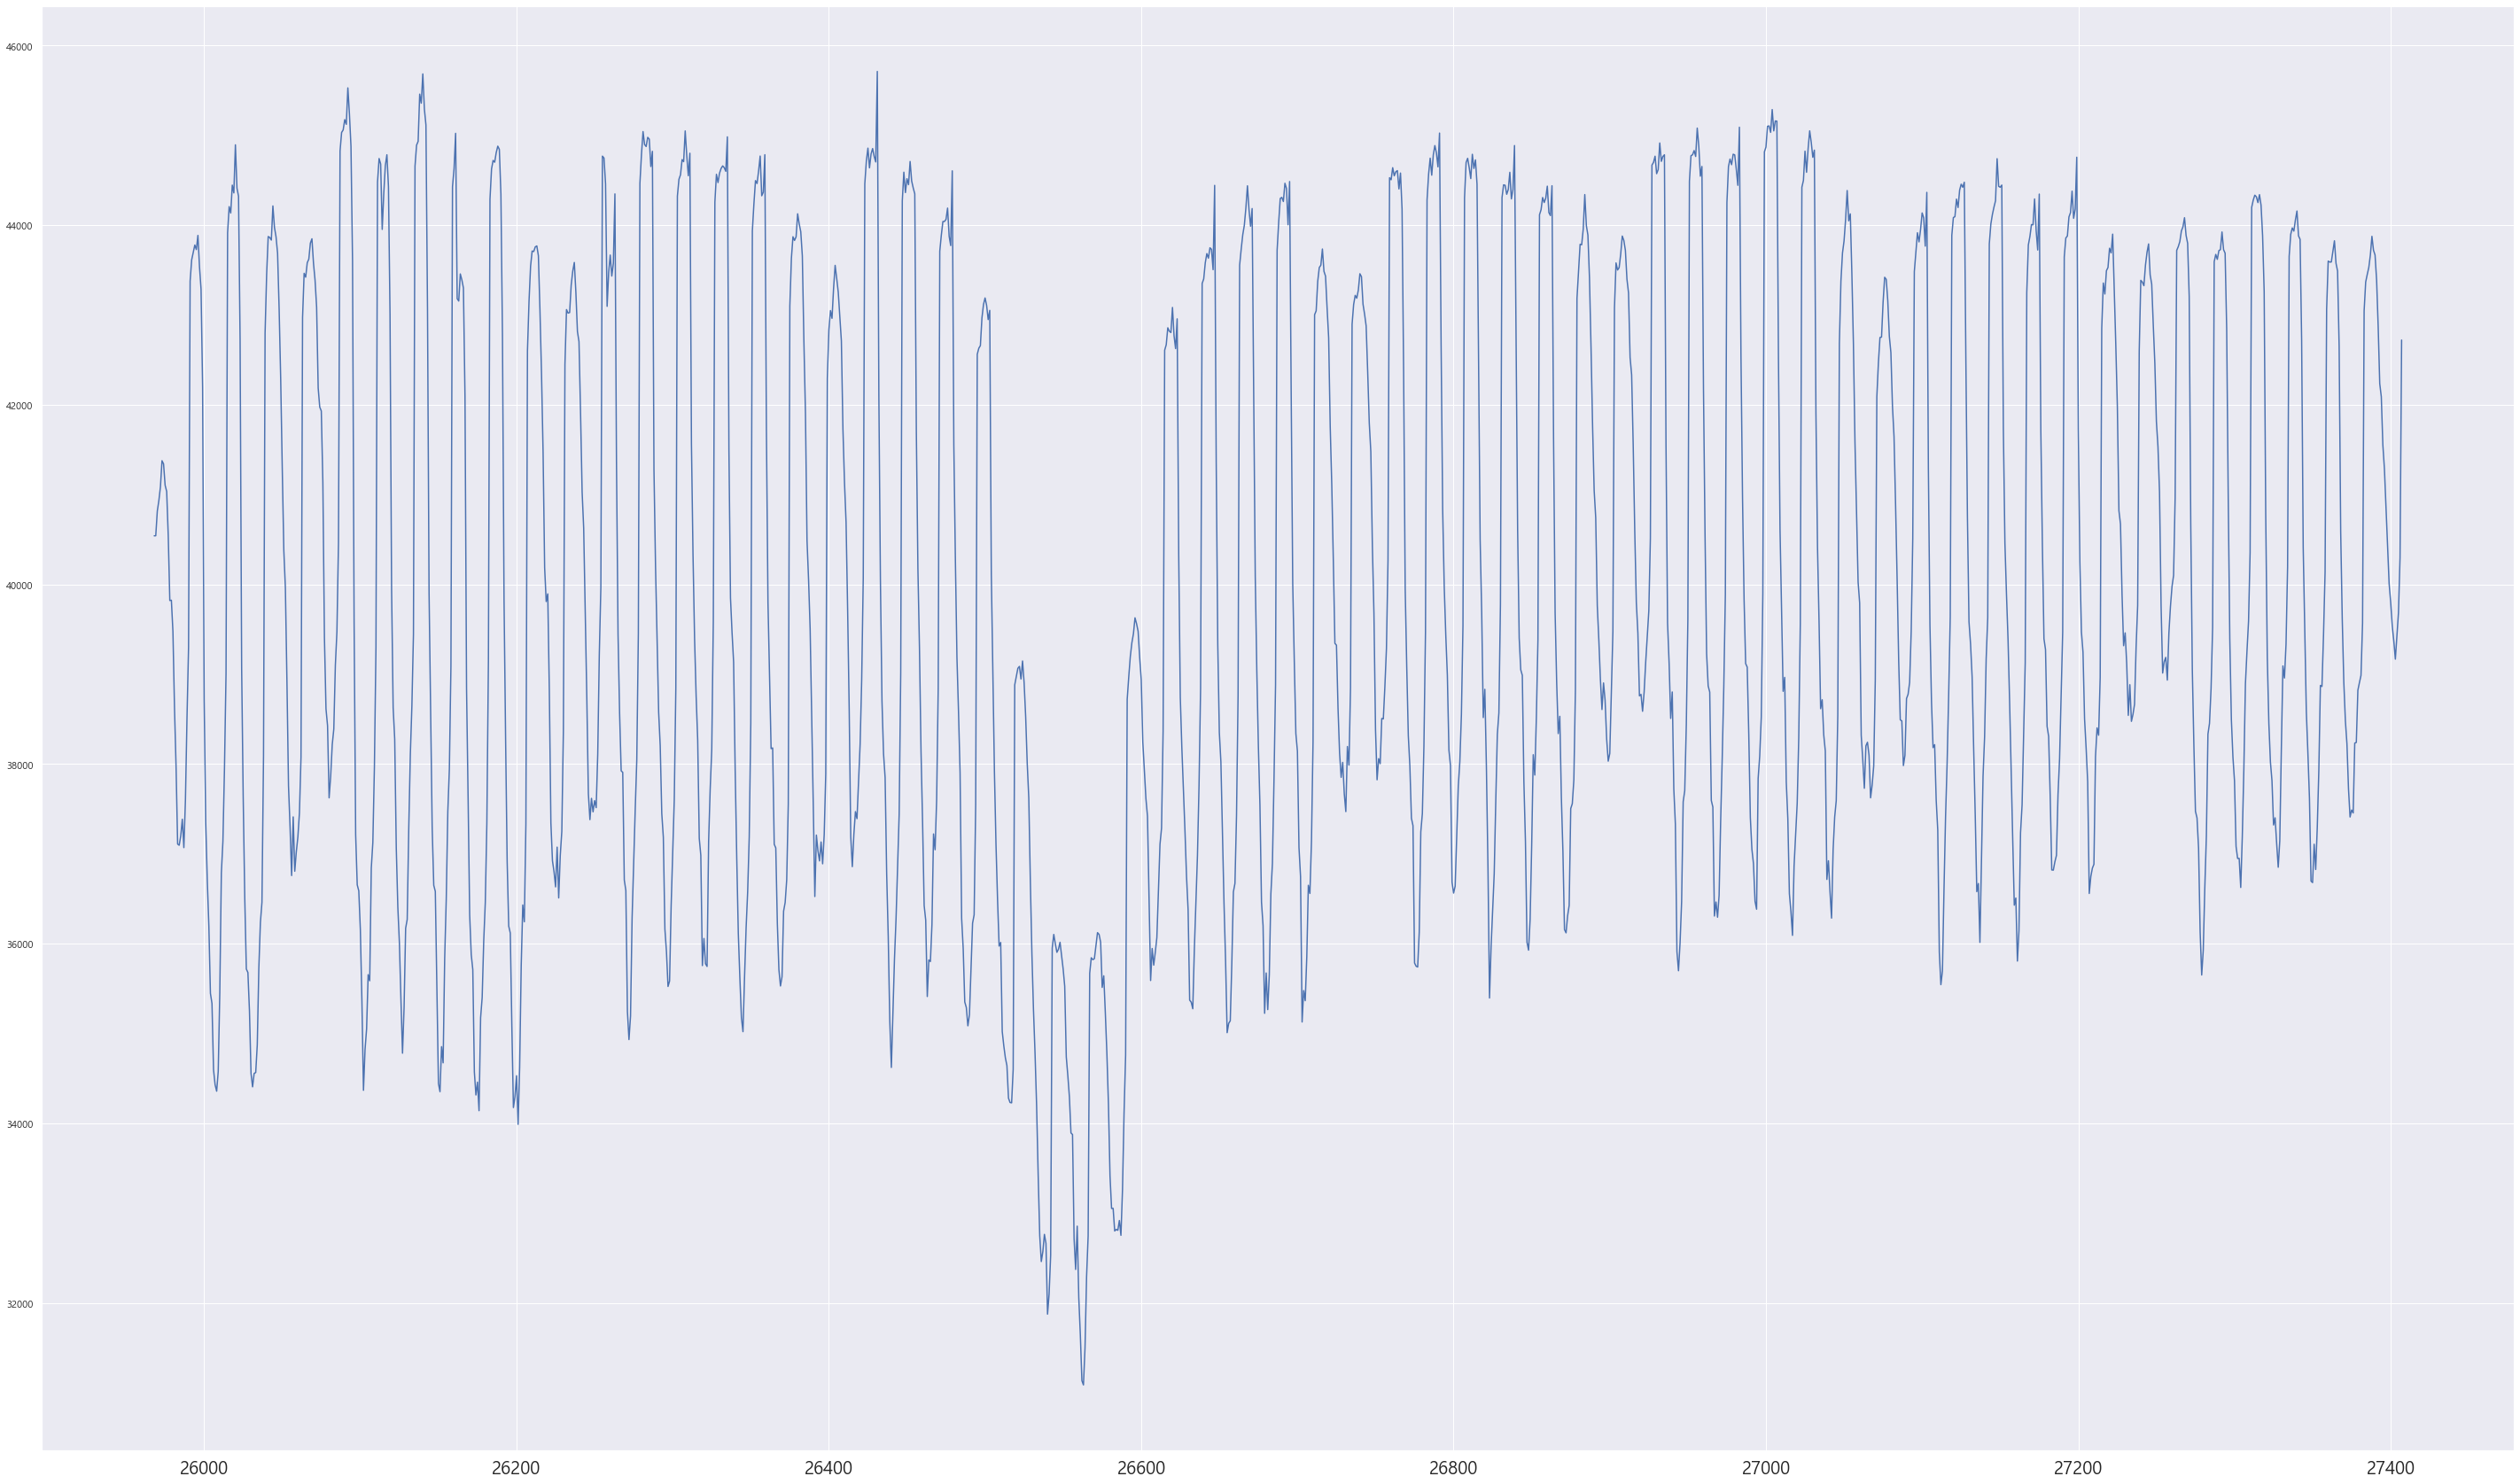

In [204]:
plt.figure(figsize=(50,30))

plt.rc('xtick', labelsize=20)
plt.plot(df_total[(df_total['year']==2020)&((df_total['month']==1)|(df_total['month']==2))]['총생활인구수'])


plt.show()

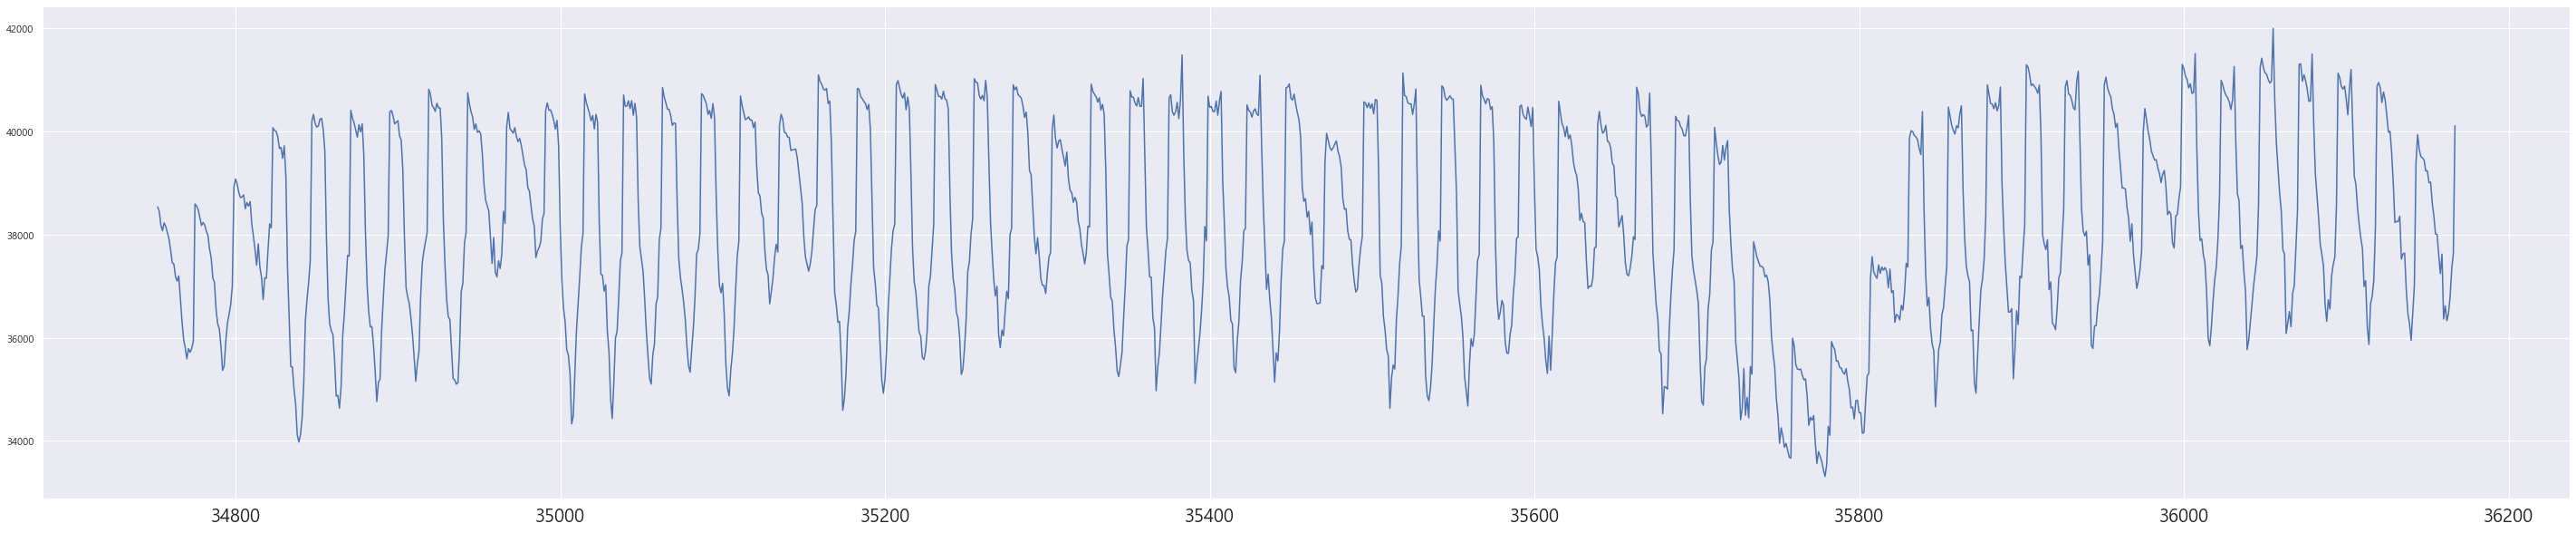

In [205]:
plt.figure(figsize=(50,10))

plt.rc('xtick', labelsize=20)
plt.plot(df_total[(df_total['year']==2021)&((df_total['month']==1)|(df_total['month']==2))]['총생활인구수'])


plt.show()

#### [실습문제4] 결측치 처리 및 불필요한 열 제거
* 롤링 & 시프트 과정에서 발생한 결측치를 처리하도록 하겠습니다.
* 불필요한 열을 추가로 제거 하겠습니다.(시간 관련 행들)

In [206]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df_total = df_total.drop(['year','month','day','hour'], axis=1)
df_total = df_total.dropna()

#### [실습문제5] train, test 데이터 나누기
* df_total과 df_test를 각각 train_x, train_y, test_x, test_y 로 나누어 주세요.
* 인덱스를 리셋 해주세요.

In [207]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

train_x = df_total.iloc[ :,1:]
train_y = df_total.iloc[ :,:1]



train_x

,1d,2d,3d,4d,5d,6d
7992,40145.0531,42675.1030,43126.9537,41688.5709,42059.8066,43922.2281
7993,40332.1435,43064.2236,43424.5640,41826.3140,42189.9046,43763.4929
7994,40521.2266,43267.3973,43403.4560,41901.0204,42157.0515,43561.5708
7995,40682.5043,44011.8941,43756.1943,42118.1170,42757.1032,43928.9929
7996,40638.0975,44073.2148,43923.2058,42163.1318,42843.0506,44150.2973
...,...,...,...,...,...,...
43507,36388.3457,37136.7204,36399.2623,36740.0375,36398.3779,36347.6980
43508,36225.6992,37647.6557,36623.1063,36895.5959,36472.4212,36812.7855
43509,36717.5775,38140.4404,37095.2255,37367.8693,37469.2889,37439.0685
43510,36792.0984,38399.6409,37615.4652,38305.7102,38286.5450,37771.6915


In [208]:
train_x

,1d,2d,3d,4d,5d,6d
7992,40145.0531,42675.1030,43126.9537,41688.5709,42059.8066,43922.2281
7993,40332.1435,43064.2236,43424.5640,41826.3140,42189.9046,43763.4929
7994,40521.2266,43267.3973,43403.4560,41901.0204,42157.0515,43561.5708
7995,40682.5043,44011.8941,43756.1943,42118.1170,42757.1032,43928.9929
7996,40638.0975,44073.2148,43923.2058,42163.1318,42843.0506,44150.2973
...,...,...,...,...,...,...
43507,36388.3457,37136.7204,36399.2623,36740.0375,36398.3779,36347.6980
43508,36225.6992,37647.6557,36623.1063,36895.5959,36472.4212,36812.7855
43509,36717.5775,38140.4404,37095.2255,37367.8693,37469.2889,37439.0685
43510,36792.0984,38399.6409,37615.4652,38305.7102,38286.5450,37771.6915


---

## 다음 단계를 위해서 데이터를 저장하겠습니다.

In [209]:
# CSV로 저장
train_x.to_csv('train_x.csv', index = False)
train_y.to_csv('train_y.csv', index = False)


In [210]:
import pandas as pd

# 학습/평가 데이터 로딩
train_x = pd.read_csv("train_x.csv")
train_y = pd.read_csv("train_y.csv")


In [211]:
train_x

,1d,2d,3d,4d,5d,6d
0,40145.0531,42675.1030,43126.9537,41688.5709,42059.8066,43922.2281
1,40332.1435,43064.2236,43424.5640,41826.3140,42189.9046,43763.4929
2,40521.2266,43267.3973,43403.4560,41901.0204,42157.0515,43561.5708
3,40682.5043,44011.8941,43756.1943,42118.1170,42757.1032,43928.9929
4,40638.0975,44073.2148,43923.2058,42163.1318,42843.0506,44150.2973
...,...,...,...,...,...,...
35515,36388.3457,37136.7204,36399.2623,36740.0375,36398.3779,36347.6980
35516,36225.6992,37647.6557,36623.1063,36895.5959,36472.4212,36812.7855
35517,36717.5775,38140.4404,37095.2255,37367.8693,37469.2889,37439.0685
35518,36792.0984,38399.6409,37615.4652,38305.7102,38286.5450,37771.6915


In [212]:
train_y

,총생활인구수
0,46972.5492
1,47302.2480
2,47312.6485
3,47483.5481
4,47756.6496
...,...
35515,33304.5400
35516,33368.7201
35517,34083.1721
35518,34380.0806


In [213]:
train_x = train_x.values
train_y = train_y.values


In [214]:
train_x

array([[40145.0531, 42675.103 , 43126.9537, 41688.5709, 42059.8066,
        43922.2281],
       [40332.1435, 43064.2236, 43424.564 , 41826.314 , 42189.9046,
        43763.4929],
       [40521.2266, 43267.3973, 43403.456 , 41901.0204, 42157.0515,
        43561.5708],
       ...,
       [36717.5775, 38140.4404, 37095.2255, 37367.8693, 37469.2889,
        37439.0685],
       [36792.0984, 38399.6409, 37615.4652, 38305.7102, 38286.545 ,
        37771.6915],
       [39822.8356, 41250.767 , 40392.1656, 41171.8208, 41108.294 ,
        41137.3627]])

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [216]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from math import sqrt

LR_reg = LinearRegression()
LR_reg.fit(train_x, train_y)

LinearRegression()

In [217]:
y_pred_LR = LR_reg.predict(train_x[-1416:])

In [219]:

df_total = pd.read_csv('df_total.csv')
df_total['기준일ID'] = pd.to_datetime(df_total['기준일ID'])

df_total['year'] = df_total['기준일ID'].dt.year
df_total['month'] = df_total['기준일ID'].dt.month
df_total['day'] = df_total['기준일ID'].dt.day

df_total

df_total = df_total[['year','month','day','시간대구분','총생활인구수']]
df_total.rename(columns={'시간대구분':'hour'},inplace=True)

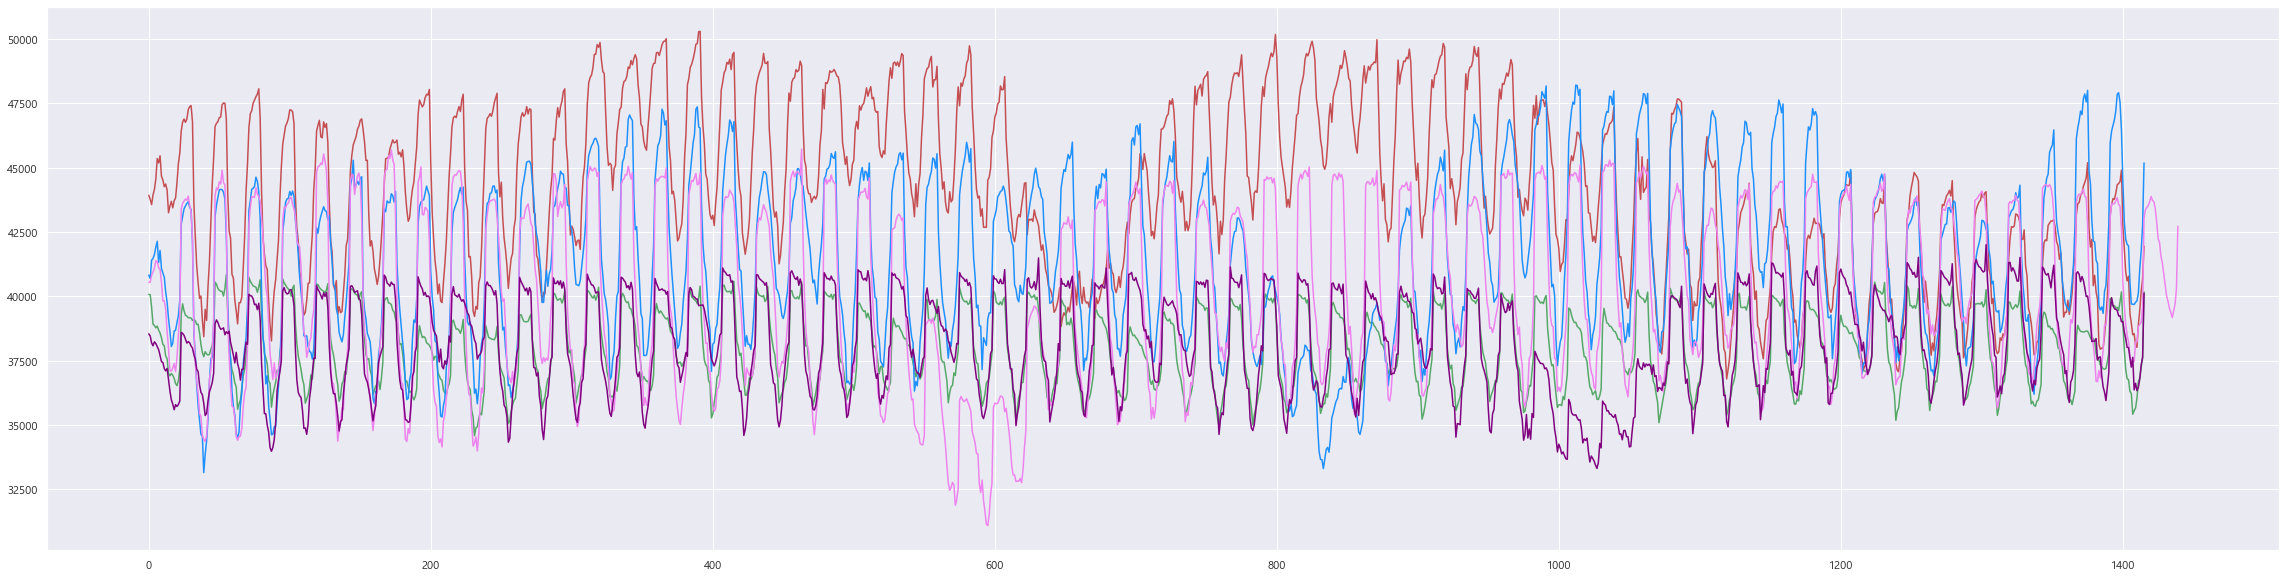

In [220]:
plt.figure(figsize=(40,10))


plt.plot(df_total[(df_total['year']==2017)&((df_total['month']==1)|(df_total['month']==2))]['총생활인구수'],'r')
plt.plot(y_pred_LR,'g')
plt.plot(df_total[(df_total['year']==2019)&((df_total['month']==1)|(df_total['month']==2))]['총생활인구수'].reset_index(drop=True),color='dodgerblue')
plt.plot(df_total[(df_total['year']==2020)&((df_total['month']==1)|(df_total['month']==2))]['총생활인구수'].reset_index(drop=True),color='violet')
plt.plot(df_total[(df_total['year']==2021)&((df_total['month']==1)|(df_total['month']==2))]['총생활인구수'].reset_index(drop=True),color='purple')



plt.show()


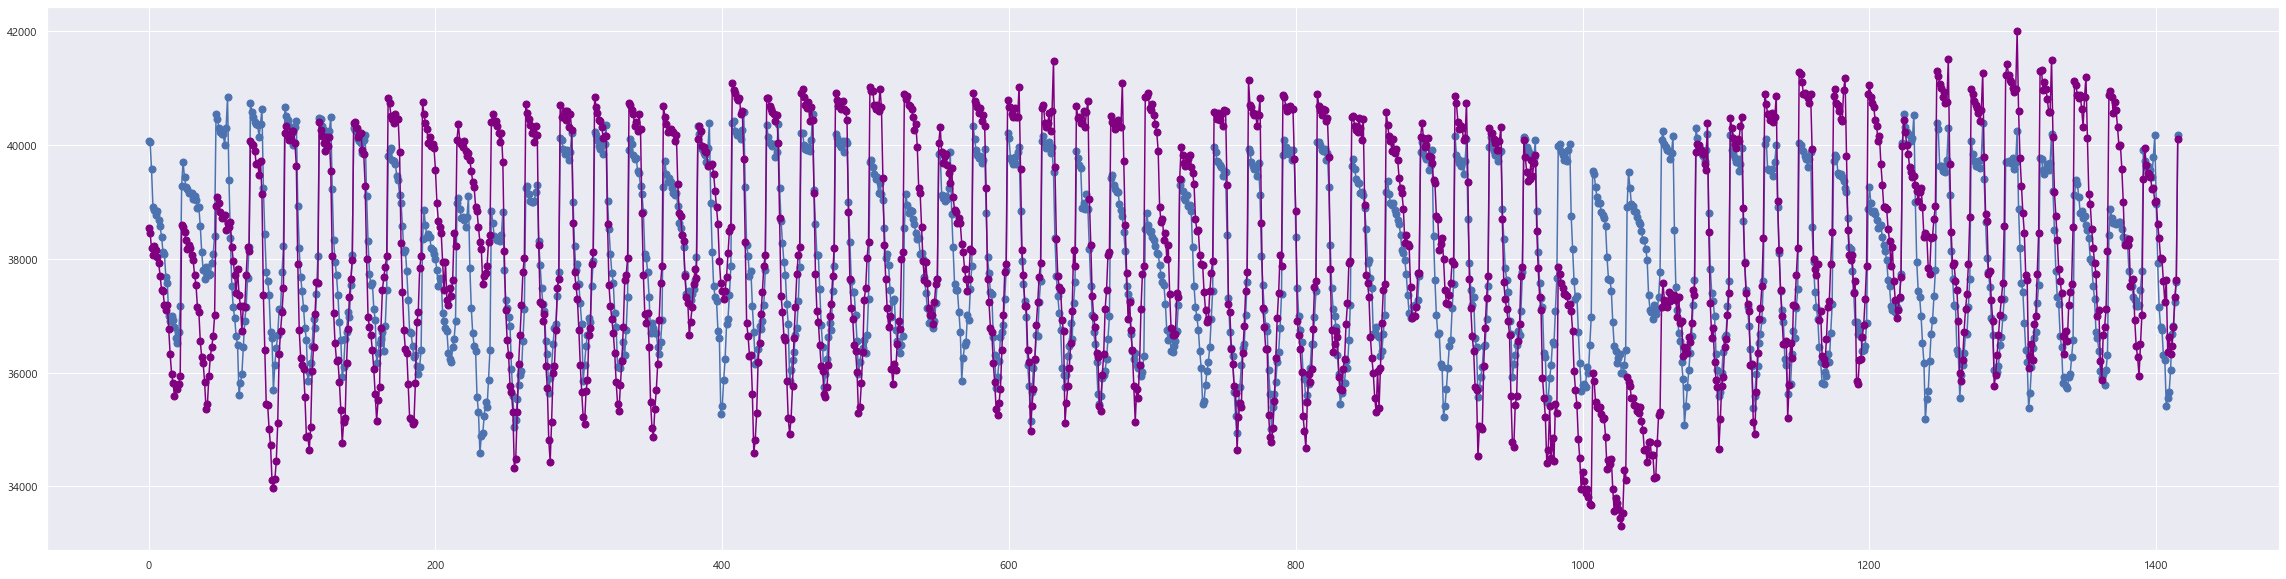

In [222]:
plt.figure(figsize=(40,10))


plt.plot(y_pred_LR,marker = 'o', markersize = 7)
plt.plot(df_total[(df_total['year']==2021)&((df_total['month']==1)|(df_total['month']==2))]['총생활인구수'].reset_index(drop=True),color='purple',marker = 'o', markersize = 7)



plt.show()

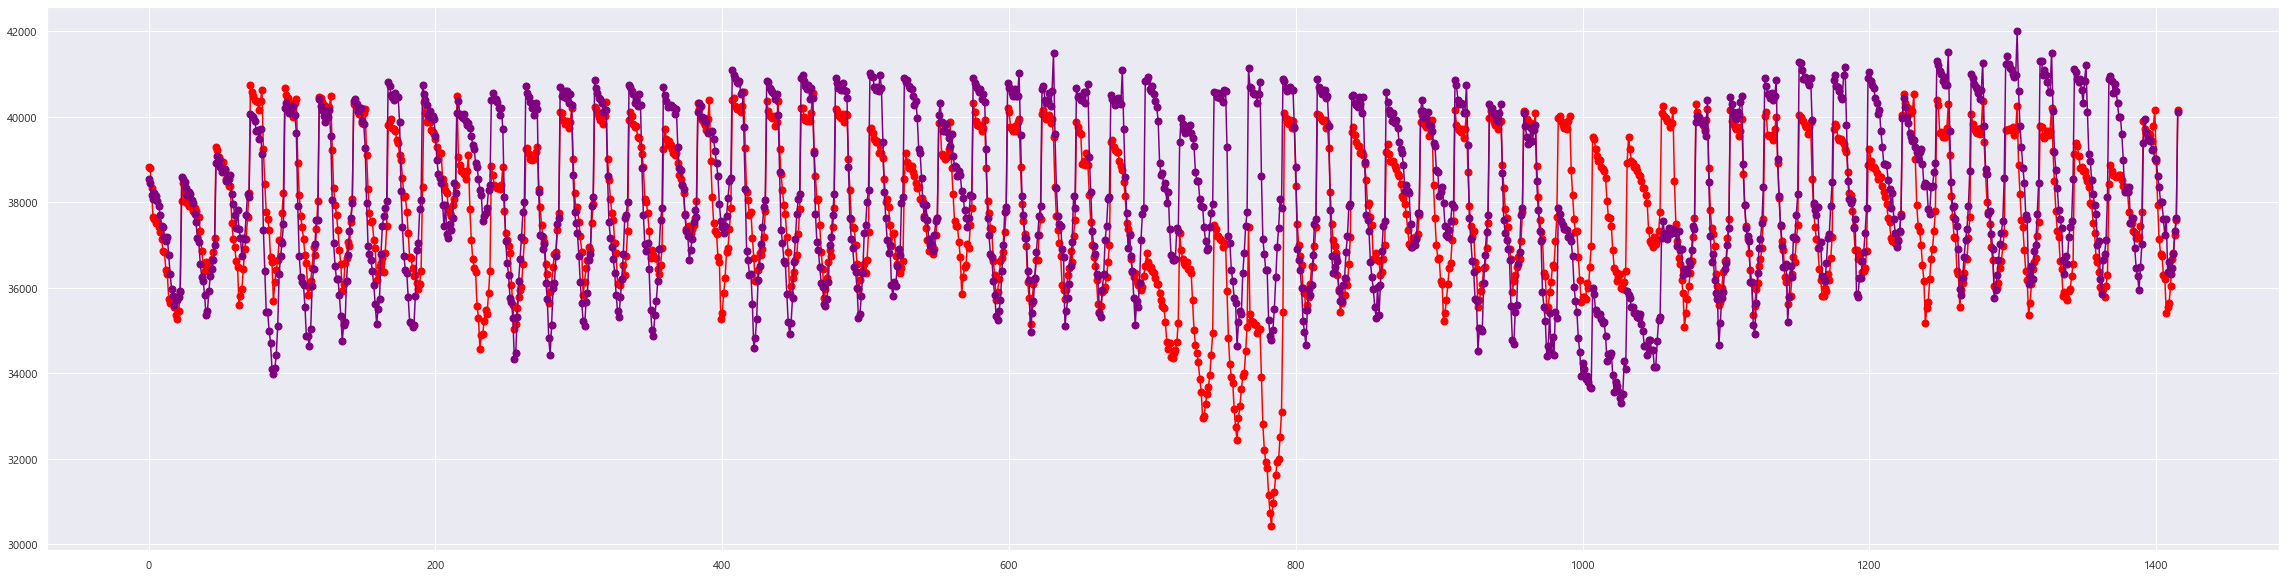

In [306]:
plt.figure(figsize=(40,10))


plt.plot(abc,marker = 'o', markersize = 7, color="red")
plt.plot(df_total[(df_total['year']==2021)&((df_total['month']==1)|(df_total['month']==2))]['총생활인구수'].reset_index(drop=True),color='purple',marker = 'o', markersize = 7)





plt.show()

In [309]:
y_pred_LR = LR_reg.predict(train_x[-1416:])
abc=pd.DataFrame(y_pred_LR)

abc[0:56]=abc[0:56]-1250
abc[54:57]=abc[54:57]-1000
abc[54:55]=abc[54:55]+500
abc[192:216]=abc[192:216]+1500


abc[24*29-1:24*30]=(abc[24*29-1:24*30])-2000
abc[24*30:24*31]=(abc[24*30:24*31])-2500
abc[24*31:24*32]=(abc[24*31:24*32])-2500
abc[24*32:24*33]=(abc[24*31:24*32])-2000



abc[:500]




,0
0,38822.541942
1,38812.017462
2,38326.436052
3,37663.282838
4,37616.576420
...,...
495,35978.623024
496,36178.997925
497,36378.849527
498,36427.612955


In [226]:
y_pred_LR = LR_reg.predict(train_x[-1416:])
abc=pd.DataFrame(y_pred_LR)

abc[0:48]=abc[0:48]-1000


abc[24*29:24*30]=(abc[24*29:24*30])-2000
abc[24*30:24*31]=(abc[24*30:24*31])-3000
abc[24*31:24*32]=(abc[24*31:24*32])-2000


In [310]:

abc=abc.reset_index()
abc.columns = ['id', 'count']
abc

,id,count
0,0,38822.541942
1,1,38812.017462
2,2,38326.436052
3,3,37663.282838
4,4,37616.576420
...,...,...
1411,1411,36686.663706
1412,1412,36823.203803
1413,1413,37244.594467
1414,1414,37597.082991


In [ ]:
df_many = pd.read_csv('new2.csv')
df_many

,id,count
0,0,38442.798266
1,1,38311.141655
2,2,38299.653858
3,3,38165.198973
4,4,38386.998608
...,...,...
1411,1411,35209.562881
1412,1412,35226.434944
1413,1413,35903.510862
1414,1414,36278.855354


In [311]:
abc.to_csv('new4.csv', index = False)

In [ ]:
pd.DataFrame(df_total[(df_total['year']==2021)&((df_total['month']==1)|(df_total['month']==2))]['총생활인구수'].reset_index(drop=True))

,총생활인구수
0,38538.5993
1,38457.1528
2,38185.1451
3,38074.2836
4,38229.0027
...,...
1411,36466.6586
1412,36795.4254
1413,37333.9824
1414,37630.8536


In [ ]:
df_total[(df_total['year']==2021)&((df_total['month']==1)|(df_total['month']==2))].reset_index()[24*42:24*44+1]

,index,year,month,day,hour,총생활인구수,7d
1008,35760,2021,2,12,0,35850.1935,44239.8017
1009,35761,2021,2,12,1,35478.3545,44496.4223
1010,35762,2021,2,12,2,35394.1509,44463.9884
1011,35763,2021,2,12,3,35379.4976,44603.5149
1012,35764,2021,2,12,4,35394.0228,44769.7662
1013,35765,2021,2,12,5,35275.1606,44327.2592
1014,35766,2021,2,12,6,35182.2657,44366.8399
1015,35767,2021,2,12,7,35198.8248,44784.7993
1016,35768,2021,2,12,8,34864.7994,41712.7969
1017,35769,2021,2,12,9,34299.7681,39797.1818


---